### Importing Libraries & Data

In [ ]:
"""
Data Observations

1. Infubinol was the only drug that had an outlier
2. Capomulin was effective in reducing tumor volume in a given mouse by 5 mm in the study
3. Tumor volume and mouse weight have a weak positive correlation
"""

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [5]:
df_meta = pd.read_csv("Mouse_metadata.csv")
df_meta.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
df_study = pd.read_csv("Study_results.csv")
df_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [5]:
df_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


### Data Cleaning

In [6]:
df_meta[df_meta.duplicated(keep = False) == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)


In [7]:
df_study[df_study.duplicated(keep = False) == True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.0,0
137,g989,0,45.0,0


In [8]:
df_study_cleaned = df_study[df_study.duplicated(keep = False) == False]

df_study_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


### Summary Statistics Tables

In [9]:
sem_meta = pd.DataFrame(df_meta.sem()).transpose()
sem_meta.index = ["SEM"]

In [10]:
df_meta.describe().append(sem_meta)

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000
SEM,0.458099,0.234288


In [11]:
sem_study = pd.DataFrame(df_study_cleaned.sem()).transpose()
sem_study.index = ["SEM"]

In [12]:
df_study_cleaned.describe().append(sem_study)

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1891.000000,1891.000000,1891.000000
mean,19.592808,50.454143,1.022739
std,14.072497,8.897660,1.138090
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.957919,1.000000
75%,30.000000,56.305633,2.000000
max,45.000000,78.567014,4.000000
SEM,0.323613,0.204611,0.026172


### Bar Plots

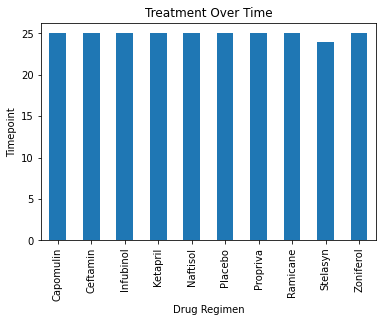

In [13]:
df_meta.groupby(["Drug Regimen"]).count()["Mouse ID"].plot(kind = "bar",
                                                          title = "Treatment Over Time",
                                                          ylabel = "Timepoint");

Text(0.5, 1.0, 'Treatment Over Time')

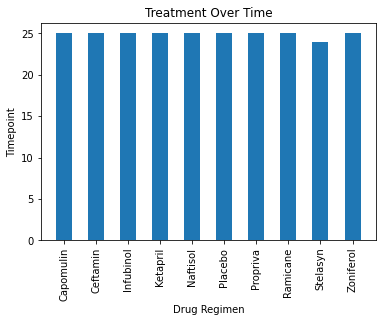

In [12]:
plt.xticks(rotation='vertical')
plt.bar(df_meta.groupby(["Drug Regimen"]).count()["Mouse ID"].index,
        df_meta.groupby(["Drug Regimen"]).count()["Mouse ID"],
       width = .5)

plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.title("Treatment Over Time")

### Pie Plots

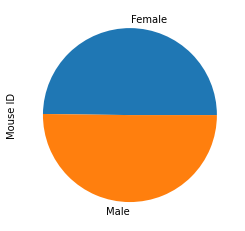

In [15]:
df_meta.groupby(["Sex"]).count()["Mouse ID"].plot(kind = "pie");

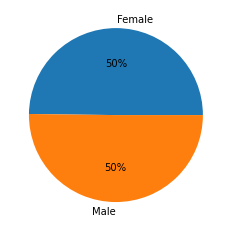

In [16]:
plt.pie(df_meta.groupby(["Sex"]).count()["Mouse ID"],
       labels = df_meta.groupby(["Sex"]).count()["Mouse ID"].index,
        autopct='%1.0f%%');

### Final Tumor Volume

In [17]:
df_combined = df_meta.merge(df_study_cleaned, on = "Mouse ID")
df_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1886,z969,Naftisol,Male,9,30,25,63.145652,2
1887,z969,Naftisol,Male,9,30,30,65.841013,3
1888,z969,Naftisol,Male,9,30,35,69.176246,4
1889,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
df_regimens = df_combined[df_combined["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
df_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1866,z581,Infubinol,Female,24,25,25,54.316407,2
1867,z581,Infubinol,Female,24,25,30,56.286750,2
1868,z581,Infubinol,Female,24,25,35,58.628399,3
1869,z581,Infubinol,Female,24,25,40,60.053740,3


In [19]:
df_regimens["Timepoint Max"] = df_regimens.groupby(["Mouse ID"])["Timepoint"].transform(max)

<ipython-input-19-c738974d3099>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regimens["Timepoint Max"] = df_regimens.groupby(["Mouse ID"])["Timepoint"].transform(max)


In [20]:
df_final = df_regimens[df_regimens["Timepoint Max"] == df_regimens["Timepoint"]][["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen"]]
df_final

,Mouse ID,Tumor Volume (mm3),Drug Regimen
9,k403,22.050126,Ramicane
19,s185,23.343598,Capomulin
29,x401,28.484033,Capomulin
39,m601,28.430964,Capomulin
49,g791,29.128472,Ramicane
...,...,...,...
1795,x822,61.386660,Ceftamin
1811,y163,67.685569,Infubinol
1843,y769,68.594745,Ceftamin
1853,y865,64.729837,Ceftamin


In [21]:
df_final.describe()

,Tumor Volume (mm3)
count,100.000000
mean,47.197795
std,12.953884
min,22.050126
25%,37.187744
50%,45.000000
75%,59.930262
max,72.226731


In [22]:
Q1 = df_final['Tumor Volume (mm3)'].quantile(0.25)
Q3 = df_final['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1

IQR

22.742517952499995

In [23]:
outlier_low = Q1 - 1.5 * IQR
outlier_high = Q3 + 1.5 * IQR

print("Outlier Low:",outlier_low)
print("Outlier High:",outlier_high)

Outlier Low: 3.0739668737500097
Outlier High: 94.04403868374999


In [24]:
df_final[(df_final['Tumor Volume (mm3)'] < outlier_low) | (df_final['Tumor Volume (mm3)'] > outlier_high)]

,Mouse ID,Tumor Volume (mm3),Drug Regimen


In [25]:
print("Minimum Tumor Value:", df_final['Tumor Volume (mm3)'].min())
print("Maximum Tumor Value:", df_final['Tumor Volume (mm3)'].max())

Minimum Tumor Value: 22.05012627
Maximum Tumor Value: 72.2267309


In [1]:
fig, ax = plt.subplots(1, 4, figsize = (15, 8))
fig.suptitle("Box Plots of Four Select Drug Regimens", fontsize = 25)

ax[0].boxplot(df_final[df_final["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"])
ax[0].set_title("Capomulin")

ax[1].boxplot(df_final[df_final["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"])
ax[1].set_title("Ramicane")

ax[2].boxplot(df_final[df_final["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"], sym = "rx")
ax[2].set_title("Infubinol")

ax[3].boxplot(df_final[df_final["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"])
ax[3].set_title("Ceftamin");

NameError: name 'plt' is not defined

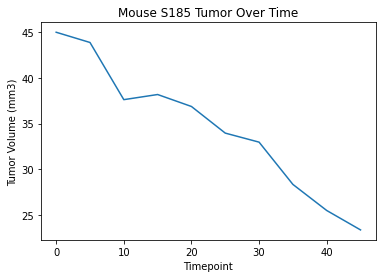

In [27]:
mouse_s185 = df_combined[(df_combined["Drug Regimen"] == "Capomulin")
                         & (df_combined["Mouse ID"] == "s185")][["Timepoint", "Tumor Volume (mm3)"]]
mouse_s185.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)", title = "Mouse S185 Tumor Over Time",
                     ylabel = "Tumor Volume (mm3)", legend = False);

In [28]:
df_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1886,z969,Naftisol,Male,9,30,25,63.145652,2
1887,z969,Naftisol,Male,9,30,30,65.841013,3
1888,z969,Naftisol,Male,9,30,35,69.176246,4
1889,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
avg_tumor = df_combined[df_combined["Drug Regimen"] == "Capomulin"][["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]].groupby(["Mouse ID"]).mean()

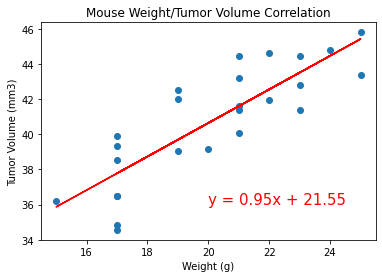

In [30]:
x_values = avg_tumor['Weight (g)']
y_values = avg_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight/Tumor Volume Correlation')
plt.show()